In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

m_df = pd.read_csv("desktop/MSU_Data_bootcamp/Movie_analysis/IMDb_movies_cleaned.csv", dtype={"imdb_title_id":str, 'year':str})

mrev_df = pd.read_csv("desktop/MSU_Data_bootcamp/Movie_analysis/mov_opening_rev.csv")

m_df

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,154,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,1906,12/26/1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,589,7.0,7.0
2,tt0001892,Den sorte drøm,1911,8/19/1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.8,188,5.0,2.0
3,tt0002101,Cleopatra,1912,11/13/1912,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,446,25.0,3.0
4,tt0002130,L'Inferno,1911,3/6/1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,2237,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,2020,1/29/2020,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,5.3,398,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,2020,2/13/2020,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,7.7,724,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,2019,3/8/2019,Drama,130,India,Malayalam,Vineesh Aaradya,7.9,265,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,2019,3/15/2019,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,6.4,194,NaN,NaN


In [2]:
#this is a calculation of user review stats of movies by genre
g_avg_vote_df = m_df[['genre', 'avg_vote']].copy()

gen_vote_stats = g_avg_vote_df.groupby('genre').agg(
    mean = pd.NamedAgg(column = 'avg_vote', aggfunc = 'mean'),
    median = pd.NamedAgg(column = 'avg_vote', aggfunc = 'median'),
    standard_deviation = pd.NamedAgg(column = 'avg_vote', aggfunc = 'std'),
    movie_count= pd.NamedAgg(column = 'avg_vote', aggfunc = 'count')
)

gvs_means = gen_vote_stats.sort_values(by = ['mean'], ascending = False)

gvs_means

,mean,median,standard_deviation,movie_count
genre,,,,
"Musical, Comedy, Family",8.7,8.7,NaN,1
"Music, Musical",8.5,8.5,NaN,1
"Family, Sci-Fi, Adventure",8.4,8.4,NaN,1
"Fantasy, Musical, Sci-Fi",8.1,8.1,NaN,1
"Fantasy, Drama, Romance",8.0,8.0,NaN,1
...,...,...,...,...
"Horror, Drama, Thriller",2.6,2.6,NaN,1
"Drama, Horror, Reality-TV",2.4,2.4,NaN,1
"Horror, Reality-TV, Thriller",2.1,2.1,NaN,1


In [3]:
#This cell is to identify the most common movie genres and look at their average scores
gvs_counts = gen_vote_stats.sort_values(by = ["movie_count"], ascending = False)

gvs_counts.head(25)

gvs_mc = gvs_counts.head(25).copy()

gvs_mc.sort_values(by = ['mean'], ascending = False)

gvs_mc

,mean,median,standard_deviation,movie_count
genre,,,,
Drama,6.357076,6.50,0.964083,12543
Comedy,5.604745,5.80,1.219596,7693
"Comedy, Drama",6.253033,6.40,0.987685,4039
"Drama, Romance",6.338726,6.50,0.954476,3455
"Comedy, Romance",5.888278,6.00,0.999580,2508
"Comedy, Drama, Romance",6.202922,6.30,0.971382,2293
Horror,4.386199,4.40,1.277780,2268
"Drama, Thriller",5.813353,5.90,1.111070,1348
"Crime, Drama",6.261579,6.40,1.033780,1343


In [4]:
#this is a calculation of user review stats of movies by country
c_avg_vote_df = m_df[['country', 'avg_vote']].copy()

con_vote_stats = c_avg_vote_df.groupby('country').agg(
    mean = pd.NamedAgg(column = 'avg_vote', aggfunc = 'mean'),
    median = pd.NamedAgg(column = 'avg_vote', aggfunc = 'median'),
    standard_deviation = pd.NamedAgg(column = 'avg_vote', aggfunc = 'std'),
    movie_count= pd.NamedAgg(column = 'avg_vote', aggfunc = 'count')
)

cs_means = con_vote_stats.sort_values(by = ['mean'], ascending = False)

cs_means

,mean,median,standard_deviation,movie_count
country,,,,
"Republic of North Macedonia, Poland",8.5,8.5,NaN,1
"USA, UK, Malta, Morocco",8.5,8.5,NaN,1
"UK, France, Poland, Germany, USA",8.5,8.5,NaN,1
"Romania, France, Italy",8.4,8.4,NaN,1
"Lebanon, USA, France, Cyprus, Qatar, UK",8.4,8.4,NaN,1
...,...,...,...,...
"France, Spain, Belgium, Canada, Mexico",1.6,1.6,NaN,1
"Italy, USA, Spain",1.6,1.6,NaN,1
"USA, Australia, India, Hong Kong, UK",1.5,1.5,NaN,1


In [5]:
#This cell is to identify the most common movie genres and look at their average scores
cs_counts = con_vote_stats.sort_values(by = ["movie_count"], ascending = False)

cs_counts.head(25)

cs_mc = cs_counts.head(25).copy()

cs_mc

,mean,median,standard_deviation,movie_count
country,,,,
USA,5.556084,5.8,1.284809,28511
India,6.224880,6.5,1.425698,6065
UK,5.781099,6.0,1.234406,4111
Japan,6.536334,6.7,0.968778,3077
France,6.108838,6.2,0.932513,3055
Italy,5.818044,6.0,1.078479,2444
Canada,5.403718,5.5,1.264684,1802
Germany,5.913324,6.1,1.123625,1396
Turkey,5.791488,6.1,1.472793,1351


In [6]:
#looking at average vote by year
#this sort operation revealed an abberant value preventing year from being a numeric data type
time_df= m_df[['year', 'avg_vote']].copy()

t_df = time_df.groupby('year').mean()

t_df.sort_values(by = 'avg_vote')

t_df

,avg_vote
year,
1894,5.900000
1906,6.100000
1911,6.140000
1912,5.980000
1913,6.546154
...,...
2017,5.696786
2018,5.688609
2019,5.791271


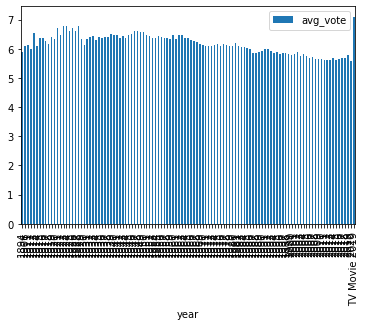

In [7]:
#average score grouped by year


t_df.plot(kind = "bar")

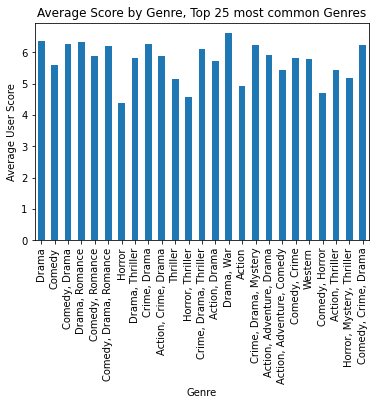

In [8]:
#genre plot

g_plot = gvs_mc[['mean']].copy()

g_plot.plot(kind = "bar", legend = False)

plt.title('Average Score by Genre, Top 25 most common Genres')
plt.ylabel("Average User Score")
plt.xlabel('Genre')
plt.show()

In [9]:
#this is the row with a screwy year value mentioned above

m_df.loc[m_df['year'] == 'TV Movie 2019']

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
83917,tt8206668,Bad Education,TV Movie 2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,7.1,23973,135.0,98.0


In [10]:
#Replacing the bad value with an appropriate one

m_df.replace('TV Movie 2019', '2019', inplace = True)

m_df.iloc[83917]

imdb_title_id                          tt8206668
title                              Bad Education
year                                        2019
date_published                              2019
genre                   Biography, Comedy, Crime
duration                                     108
country                                      USA
language                                 English
director                             Cory Finley
avg_vote                                     7.1
votes                                      23973
reviews_from_users                           135
reviews_from_critics                          98
Name: 83917, dtype: object

In [11]:
m_df = m_df.astype({'year':'int64'})

m_df.dtypes

imdb_title_id            object
title                    object
year                      int64
date_published           object
genre                    object
duration                  int64
country                  object
language                 object
director                 object
avg_vote                float64
votes                     int64
reviews_from_users      float64
reviews_from_critics    float64
dtype: object

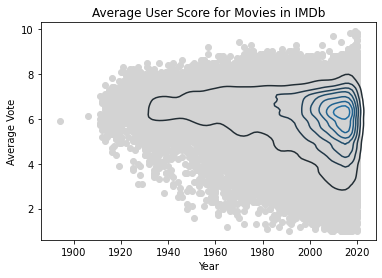

In [12]:
#attempting to plot year by average vote in a scatter plot
#this rendering uses a contour polt from the seaborn module, which seems kind of computationally expensive

plt.scatter(m_df['year'], m_df['avg_vote'], facecolors = "lightgrey")
sns.kdeplot(m_df['year'], m_df['avg_vote'])
plt.xlabel("Year")
plt.ylabel("Average Vote")
plt.title('Average User Score for Movies in IMDb')

plt.savefig("desktop/movie_figures/av_scores_by_year.png")
plt.show()



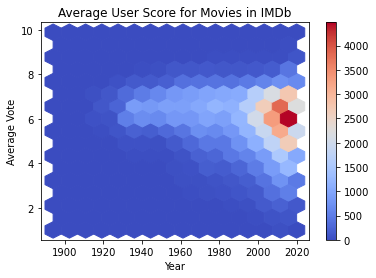

In [13]:
#this is a hexbin plot to clarify the very dense scatter plot
#cmap is for colormap, this is a scheme that dictates how the density is shown
#sharex = False makes it so the x labels show up

m_df.plot.hexbin(x = 'year', y = 'avg_vote', gridsize = 15, cmap = 'coolwarm', sharex = False)
plt.xlabel("Year")
plt.ylabel("Average Vote")
plt.title('Average User Score for Movies in IMDb')

plt.savefig("desktop/movie_figures/av_scores_by_year_hex.png")
plt.show()



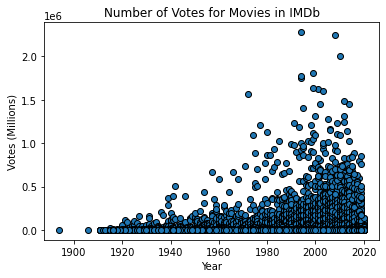

In [14]:
#do the same thing with votes (contoured scatter)
plt.scatter(m_df['year'], m_df['votes'], edgecolors = "black")
#sns.kdeplot(m_df['year'], m_df['votes'])
plt.xlabel("Year")
plt.ylabel("Votes (Millions)")
plt.title('Number of Votes for Movies in IMDb')
plt.savefig("desktop/movie_figures/Votes_by_year.png")
plt.show()

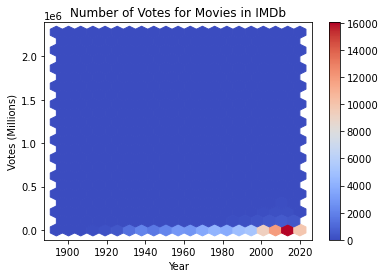

In [15]:
m_df.plot.hexbin(x = 'year', y = 'votes', gridsize = 20, cmap = 'coolwarm', sharex = False)
plt.xlabel("Year")
plt.ylabel("Votes (Millions)")
plt.title('Number of Votes for Movies in IMDb')
plt.savefig("desktop/movie_figures/Votes_by_year_hex.png")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F84003D0D0>]],
      dtype=object)

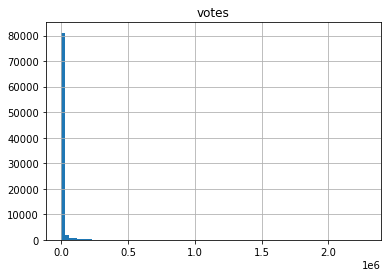

In [16]:
vot_df = m_df[["votes"]].copy()

xlimit = 500000

vot_df.hist(bins = 80)

In [17]:
#looking at average vote by year
#this sort operation revealed an abberant value preventing year from being a numeric data type
time_df= m_df[['year', 'avg_vote']].copy()

t_df = time_df.groupby('year').mean()

t_df.sort_values(by = 'avg_vote')

t_df

,avg_vote
year,
1894,5.900000
1906,6.100000
1911,6.140000
1912,5.980000
1913,6.546154
...,...
2016,5.658062
2017,5.696786
2018,5.688609


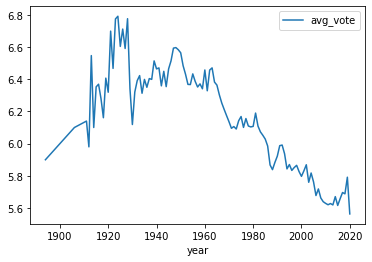

In [18]:
#average score grouped by year


t_df.plot(kind = "line")

In [19]:
#looking at average vote by year
#this sort operation revealed an abberant value preventing year from being a numeric data type
time_tots_df= m_df[['year', 'votes']].copy()

t2_df = time_tots_df.groupby('year').median()

t2_df

,votes
year,
1894,154.0
1906,589.0
1911,162.0
1912,305.0
1913,548.0
...,...
2016,508.5
2017,480.0
2018,470.0


Text(0.5, 1.0, 'Median Votes per Movie by Year')

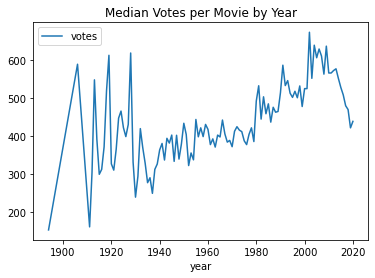

In [20]:
t2_df.plot(kind = "line")
plt.title('Median Votes per Movie by Year')

Text(0.5, 1.0, 'Mean Votes per Movie by Year')

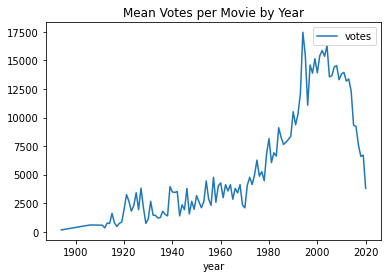

In [21]:
tt3_df= m_df[['year', 'votes']].copy()

t3_df = tt3_df.groupby('year').mean()

t3_df.plot(kind = "line")
plt.title('Mean Votes per Movie by Year')

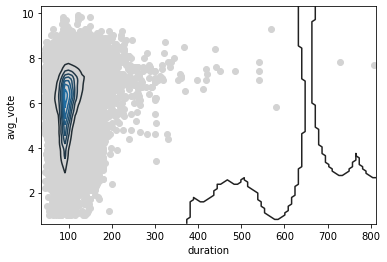

In [22]:
#scatter plot for duration vs avg vote

plt.scatter(m_df['duration'], m_df['avg_vote'], facecolors = "lightgrey")
sns.kdeplot(m_df['duration'], m_df['avg_vote'])

plt.show()

In [23]:
m_df.dtypes

imdb_title_id            object
title                    object
year                      int64
date_published           object
genre                    object
duration                  int64
country                  object
language                 object
director                 object
avg_vote                float64
votes                     int64
reviews_from_users      float64
reviews_from_critics    float64
dtype: object

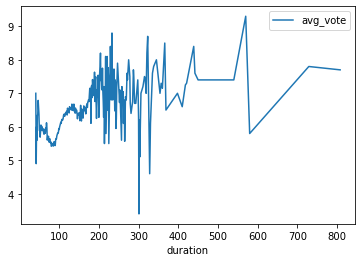

In [24]:
#filtering outliers and replotting
#filter didn't work because it doesn't think duration is an integer
#I'm going to decline to work on this one, because it doesn't look like there is much of a correlation anyway based on the 
#plot below

dur_df = m_df[['duration', 'avg_vote']].copy()

#dur_df = dur_df[dur_df['duration' < 200]]
#plt.scatter(dur_df['duration'], dur_df['avg_vote'], facecolors = "lightgrey")
#sns.kdeplot(dur_df['duration'], dur_df['avg_vote'])

#plt.show()

dur_df = dur_df.groupby('duration').mean()

dur_df.plot(kind = "line")

#look for what the outliers for duration are

In [25]:
gvs_counts.head(50)

,mean,median,standard_deviation,movie_count
genre,,,,
Drama,6.357076,6.50,0.964083,12543
Comedy,5.604745,5.80,1.219596,7693
"Comedy, Drama",6.253033,6.40,0.987685,4039
"Drama, Romance",6.338726,6.50,0.954476,3455
"Comedy, Romance",5.888278,6.00,0.999580,2508
"Comedy, Drama, Romance",6.202922,6.30,0.971382,2293
Horror,4.386199,4.40,1.277780,2268
"Drama, Thriller",5.813353,5.90,1.111070,1348
"Crime, Drama",6.261579,6.40,1.033780,1343


In [26]:
#Genres Anova
#setting dfs of movies by single component genre and average vote

horror_df = m_df[m_df['genre']=="Horror"]['avg_vote']
drama_df = m_df[m_df['genre']=="Drama"]['avg_vote']
comedy_df = m_df[m_df['genre']=="Comedy"]['avg_vote']
action_df = m_df[m_df['genre']=="Action"]['avg_vote']
western_df = m_df[m_df['genre']=="Western"]['avg_vote']
thriller_df = m_df[m_df['genre']=="Thriller"]['avg_vote']
romance_df = m_df[m_df['genre']=="Romance"]['avg_vote']

gen_stat, genp = st.f_oneway(horror_df, drama_df, comedy_df, action_df, western_df, thriller_df, romance_df)

print(f'The p - value is {genp}')

The p - value is 0.0


In [27]:
#Welches t-test between horror and drama

st.ttest_ind(horror_df, drama_df, equal_var = False)

Ttest_indResult(statistic=-69.94395887619143, pvalue=0.0)

In [28]:
st.ttest_ind(comedy_df, drama_df, equal_var = False)

Ttest_indResult(statistic=-46.00332937041193, pvalue=0.0)

In [29]:
genre_plot = {
    "Horror":horror_df, "Drama": drama_df, "Comedy": comedy_df,
    "Action":action_df, "Western":western_df, "Thriller": thriller_df, 
    "Romance": romance_df
}

gp_df = pd.DataFrame(data = genre_plot)

#gp_df

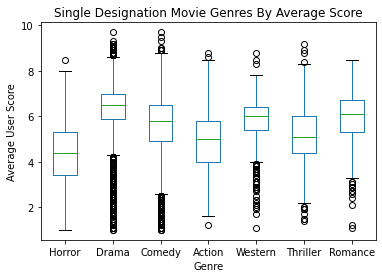

In [30]:
#boxplot for single designation movie genres

boxplot = gp_df.boxplot(grid = False)

plt.title('Single Designation Movie Genres By Average Score')
plt.ylabel('Average User Score')
plt.xlabel('Genre')

#plt.savefig("desktop/movie_figures/Votes_by_genre.png")
plt.show()

Text(0.5, 0, 'Average User Score')

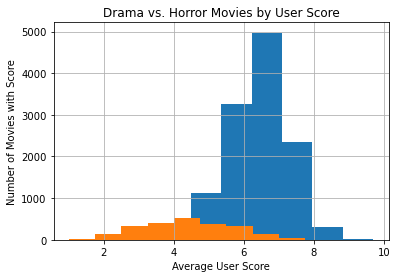

In [31]:
#histograms of horror and drama movie scores
drama_df.hist()
horror_df.hist()
plt.title('Drama vs. Horror Movies by User Score')
plt.ylabel('Number of Movies with Score')
plt.xlabel('Average User Score')

#plt.savefig("desktop/movie_figures/HvsD.png")

In [32]:
mrev_df.head()

,Year,Film,Opening,Weekend,Distributor,Budget
0,1983,Star Wars: Episode VI - Return of the Jedi,59305165,May 27-30,20th Century Fox,32500000.0
1,1983,Superman III,56837690,Jul 1-4,Warner Bros.,39000000.0
2,1983,Jaws 3D,52212400,Jul 22-24,Universal Pictures,20500000.0
3,1984,Indiana Jones and the Temple of Doom,62680115,May 25-28,Paramount Pictures,28000000.0
4,1984,Star Trek III: The Search for Spock,50208004,May 25-28,Paramount Pictures,17000000.0


In [33]:
#merging the financial information with the IMDb dataframe information

mrev_df.rename(columns = {"Film":"title"}, inplace = True)

m_combine = pd.merge(mrev_df, m_df, on= "title")

m_combine

,Year,title,Opening,Weekend,Distributor,Budget,imdb_title_id,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
0,1983,Superman III,56837690,Jul 1-4,Warner Bros.,39000000.0,tt0086393,1983,6/17/1983,"Action, Adventure, Comedy",125,"UK, USA","English, Italian, Spanish",Richard Lester,5.0,63179,262.0,119.0
1,1984,Ghostbusters,60535933,Jun 8-10,Columbia Pictures,30000000.0,tt1289401,2016,7/28/2016,"Action, Comedy, Fantasy",117,"USA, Australia",English,Paul Feig,5.2,200067,2203.0,689.0
2,1988,Cocktail,50052220,Jul 29-31,Walt Disney,20000000.0,tt0094889,1988,1/18/1989,"Comedy, Drama, Romance",104,"USA, Canada","English, Spanish Sign Language",Roger Donaldson,5.9,77870,130.0,60.0
3,1988,Cocktail,50052220,Jul 29-31,Walt Disney,20000000.0,tt1821373,2010,10/22/2010,"Drama, Musical, Thriller",111,India,Malayalam,Arun Kumar,7.2,782,4.0,NaN
4,1988,Cocktail,50052220,Jul 29-31,Walt Disney,20000000.0,tt2168910,2012,7/13/2012,"Comedy, Drama, Romance",146,"UK, India",Hindi,Homi Adajania,6.3,13100,64.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,2019,Joker,142713298,Oct 4-6,Warner Bros.,55000000.0,tt7286456,2019,10/3/2019,"Crime, Drama, Thriller",122,"USA, Canada",English,Todd Phillips,8.5,855097,10472.0,698.0
450,2019,Midway,100490654,Nov 8-10,Lionsgate,100000000.0,tt6924650,2019,11/27/2019,"Action, Adventure, Drama",138,"China, Hong Kong, Canada, USA","English, Japanese, Mandarin",Roland Emmerich,6.7,57789,946.0,174.0
451,2020,1917,117434941,Jan 10-12,Universal Pictures,95000000.0,tt8579674,2019,1/23/2020,"Drama, War",119,"USA, UK, India, Spain, Canada, China","English, French, German",Sam Mendes,8.3,362897,2843.0,474.0
452,2020,Bad Boys for Life,148594253,Jan 17-19,Sony Pictures,90000000.0,tt1502397,2020,2/20/2020,"Action, Comedy, Crime",124,"USA, Mexico","English, Spanish","Adil El Arbi, Bilall Fallah",6.6,111557,1072.0,238.0


In [34]:
#setting year values as floats so that they can be numeric
m_combine = m_combine.astype({'year':'float64', 'Year':'float64'})



In [35]:
#checking on data types
m_combine.dtypes

Year                    float64
title                    object
Opening                   int64
Weekend                  object
Distributor              object
Budget                  float64
imdb_title_id            object
year                    float64
date_published           object
genre                    object
duration                  int64
country                  object
language                 object
director                 object
avg_vote                float64
votes                     int64
reviews_from_users      float64
reviews_from_critics    float64
dtype: object

In [36]:
#using the two year columns to filter merge errors
m_combine_f = m_combine[m_combine['Year'] == m_combine['year']]
m_combine_f




,Year,title,Opening,Weekend,Distributor,Budget,imdb_title_id,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
0,1983.0,Superman III,56837690,Jul 1-4,Warner Bros.,39000000.0,tt0086393,1983.0,6/17/1983,"Action, Adventure, Comedy",125,"UK, USA","English, Italian, Spanish",Richard Lester,5.0,63179,262.0,119.0
2,1988.0,Cocktail,50052220,Jul 29-31,Walt Disney,20000000.0,tt0094889,1988.0,1/18/1989,"Comedy, Drama, Romance",104,"USA, Canada","English, Spanish Sign Language",Roger Donaldson,5.9,77870,130.0,60.0
7,1989.0,Batman,93294088,Jun 23-25,Warner Bros.,35000000.0,tt0096895,1989.0,10/20/1989,"Action, Adventure",126,"USA, UK","English, French, Spanish",Tim Burton,7.5,332356,934.0,229.0
8,1989.0,Harlem Nights,52044039,Nov 17-19,Paramount Pictures,30000000.0,tt0097481,1989.0,11/17/1989,"Comedy, Crime, Drama",116,USA,English,Eddie Murphy,6.1,19829,75.0,26.0
11,1990.0,Dick Tracy,67952401,Jun 15-17,Walt Disney,47000000.0,tt0099422,1990.0,10/5/1990,"Action, Comedy, Crime",105,USA,English,Warren Beatty,6.1,56659,194.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,2019.0,Spider-Man: Far from Home,174209668,Jul 5-7,Sony Pictures,160000000.0,tt6320628,2019.0,7/10/2019,"Action, Adventure, Sci-Fi",129,USA,"English, Italian, Czech",Jon Watts,7.5,304708,2041.0,415.0
443,2019.0,Downton Abbey,113373910,Sep 20-22,Focus Features,13000000.0,tt6398184,2019.0,10/24/2019,"Drama, Romance",122,"UK, USA",English,Michael Engler,7.4,35846,441.0,174.0
449,2019.0,Joker,142713298,Oct 4-6,Warner Bros.,55000000.0,tt7286456,2019.0,10/3/2019,"Crime, Drama, Thriller",122,"USA, Canada",English,Todd Phillips,8.5,855097,10472.0,698.0
450,2019.0,Midway,100490654,Nov 8-10,Lionsgate,100000000.0,tt6924650,2019.0,11/27/2019,"Action, Adventure, Drama",138,"China, Hong Kong, Canada, USA","English, Japanese, Mandarin",Roland Emmerich,6.7,57789,946.0,174.0


In [37]:
#getting rid of redundant year columns

m_combine_f = m_combine_f.drop('year', 1)

m_combine_f

,Year,title,Opening,Weekend,Distributor,Budget,imdb_title_id,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
0,1983.0,Superman III,56837690,Jul 1-4,Warner Bros.,39000000.0,tt0086393,6/17/1983,"Action, Adventure, Comedy",125,"UK, USA","English, Italian, Spanish",Richard Lester,5.0,63179,262.0,119.0
2,1988.0,Cocktail,50052220,Jul 29-31,Walt Disney,20000000.0,tt0094889,1/18/1989,"Comedy, Drama, Romance",104,"USA, Canada","English, Spanish Sign Language",Roger Donaldson,5.9,77870,130.0,60.0
7,1989.0,Batman,93294088,Jun 23-25,Warner Bros.,35000000.0,tt0096895,10/20/1989,"Action, Adventure",126,"USA, UK","English, French, Spanish",Tim Burton,7.5,332356,934.0,229.0
8,1989.0,Harlem Nights,52044039,Nov 17-19,Paramount Pictures,30000000.0,tt0097481,11/17/1989,"Comedy, Crime, Drama",116,USA,English,Eddie Murphy,6.1,19829,75.0,26.0
11,1990.0,Dick Tracy,67952401,Jun 15-17,Walt Disney,47000000.0,tt0099422,10/5/1990,"Action, Comedy, Crime",105,USA,English,Warren Beatty,6.1,56659,194.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,2019.0,Spider-Man: Far from Home,174209668,Jul 5-7,Sony Pictures,160000000.0,tt6320628,7/10/2019,"Action, Adventure, Sci-Fi",129,USA,"English, Italian, Czech",Jon Watts,7.5,304708,2041.0,415.0
443,2019.0,Downton Abbey,113373910,Sep 20-22,Focus Features,13000000.0,tt6398184,10/24/2019,"Drama, Romance",122,"UK, USA",English,Michael Engler,7.4,35846,441.0,174.0
449,2019.0,Joker,142713298,Oct 4-6,Warner Bros.,55000000.0,tt7286456,10/3/2019,"Crime, Drama, Thriller",122,"USA, Canada",English,Todd Phillips,8.5,855097,10472.0,698.0
450,2019.0,Midway,100490654,Nov 8-10,Lionsgate,100000000.0,tt6924650,11/27/2019,"Action, Adventure, Drama",138,"China, Hong Kong, Canada, USA","English, Japanese, Mandarin",Roland Emmerich,6.7,57789,946.0,174.0


In [38]:
#write data set out to csv

#m_combine_f.to_csv('Desktop/financials_w_IMDB.csv', index = False)

In [39]:
m_combine_fd = m_combine_f.dropna()

m_combine_fd

,Year,title,Opening,Weekend,Distributor,Budget,imdb_title_id,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
0,1983.0,Superman III,56837690,Jul 1-4,Warner Bros.,39000000.0,tt0086393,6/17/1983,"Action, Adventure, Comedy",125,"UK, USA","English, Italian, Spanish",Richard Lester,5.0,63179,262.0,119.0
2,1988.0,Cocktail,50052220,Jul 29-31,Walt Disney,20000000.0,tt0094889,1/18/1989,"Comedy, Drama, Romance",104,"USA, Canada","English, Spanish Sign Language",Roger Donaldson,5.9,77870,130.0,60.0
7,1989.0,Batman,93294088,Jun 23-25,Warner Bros.,35000000.0,tt0096895,10/20/1989,"Action, Adventure",126,"USA, UK","English, French, Spanish",Tim Burton,7.5,332356,934.0,229.0
8,1989.0,Harlem Nights,52044039,Nov 17-19,Paramount Pictures,30000000.0,tt0097481,11/17/1989,"Comedy, Crime, Drama",116,USA,English,Eddie Murphy,6.1,19829,75.0,26.0
11,1990.0,Dick Tracy,67952401,Jun 15-17,Walt Disney,47000000.0,tt0099422,10/5/1990,"Action, Comedy, Crime",105,USA,English,Warren Beatty,6.1,56659,194.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,2019.0,Spider-Man: Far from Home,174209668,Jul 5-7,Sony Pictures,160000000.0,tt6320628,7/10/2019,"Action, Adventure, Sci-Fi",129,USA,"English, Italian, Czech",Jon Watts,7.5,304708,2041.0,415.0
443,2019.0,Downton Abbey,113373910,Sep 20-22,Focus Features,13000000.0,tt6398184,10/24/2019,"Drama, Romance",122,"UK, USA",English,Michael Engler,7.4,35846,441.0,174.0
449,2019.0,Joker,142713298,Oct 4-6,Warner Bros.,55000000.0,tt7286456,10/3/2019,"Crime, Drama, Thriller",122,"USA, Canada",English,Todd Phillips,8.5,855097,10472.0,698.0
450,2019.0,Midway,100490654,Nov 8-10,Lionsgate,100000000.0,tt6924650,11/27/2019,"Action, Adventure, Drama",138,"China, Hong Kong, Canada, USA","English, Japanese, Mandarin",Roland Emmerich,6.7,57789,946.0,174.0


The correlation is 0.28373290387529404


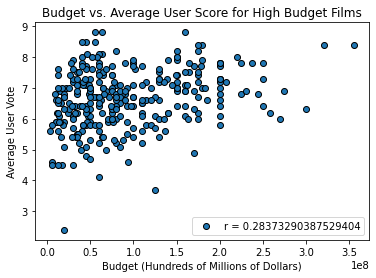

In [40]:
#scatter plot to look for correlation between budget and user rating
r_val = st.pearsonr(m_combine_fd['Budget'], m_combine_fd['avg_vote'])

plt.scatter(m_combine_fd['Budget'], m_combine_fd['avg_vote'], edgecolors = "black", label = f'r = {r_val[0]}')
plt.ylabel('Average User Vote')
plt.xlabel('Budget (Hundreds of Millions of Dollars)')
plt.title('Budget vs. Average User Score for High Budget Films')
plt.legend()


print(f'The correlation is {r_val[0]}')
plt.savefig("desktop/movie_figures/BvsAve.png")
plt.show()

The correlation is 0.2749623813539261


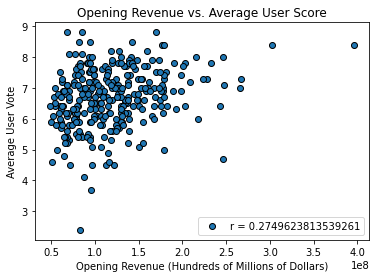

In [41]:
#scatter plot to look at opening revenue vs vote counts 
r_val2 = st.pearsonr(m_combine_fd['Opening '], m_combine_fd['avg_vote'])

plt.scatter(m_combine_fd['Opening '], m_combine_fd['avg_vote'], edgecolors = "black", label = f'r = {r_val2[0]}')
plt.ylabel('Average User Vote')
plt.xlabel('Opening Revenue (Hundreds of Millions of Dollars)')
plt.title('Opening Revenue vs. Average User Score')
plt.legend()
plt.savefig("desktop/movie_figures/Votes_by_opening.png")



print(f'The correlation is {r_val2[0]}')

plt.show()

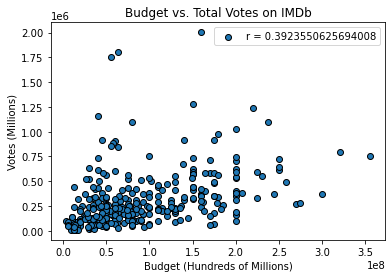

The correlation is 0.3923550625694008


In [42]:
#plot to look at vote counts and budget
r_val3 = st.pearsonr(m_combine_fd['Budget'], m_combine_fd['votes'])

plt.scatter(m_combine_fd['Budget'], m_combine_fd['votes'], edgecolors = "black", label = f'r = {r_val3[0]}')
plt.ylabel('Votes (Millions)')
plt.xlabel('Budget (Hundreds of Millions)')
plt.title("Budget vs. Total Votes on IMDb")
plt.legend()
plt.savefig("desktop/movie_figures/totVotes_vs_budg.png")

plt.show()


print(f'The correlation is {r_val3[0]}')



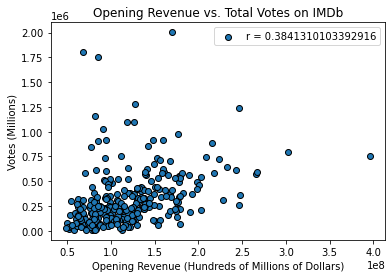

The correlation is 0.3841310103392916


In [53]:
r_val4 = st.pearsonr(m_combine_fd['Opening '], m_combine_fd['votes'])

plt.scatter(m_combine_fd['Opening '], m_combine_fd['votes'], edgecolors = "black", label = f'r = {r_val4[0]}')
plt.ylabel('Votes (Millions)')
plt.xlabel('Opening Revenue (Hundreds of Millions of Dollars)')
plt.title('Opening Revenue vs. Total Votes on IMDb')
plt.legend()
plt.savefig("desktop/movie_figures/totvotes_vs_open.png")
plt.show()

r_val4 = st.pearsonr(m_combine_fd['Opening '], m_combine_fd['votes'])

print(f'The correlation is {r_val4[0]}')

In [44]:
#m_df.to_csv('desktop/IMDb_fixed_years_data.csv', index = False)

In [45]:
m_combine_fd.describe()

,Year,Opening,Budget,duration,avg_vote,votes,reviews_from_users,reviews_from_critics
count,304.000000,3.040000e+02,3.040000e+02,304.000000,304.000000,3.040000e+02,304.000000,304.000000
mean,2007.171053,1.184722e+08,9.276217e+07,116.802632,6.664803,3.149994e+05,992.049342,297.226974
std,7.493254,4.799676e+07,6.662899e+07,19.890970,0.950028,2.846870e+05,1121.576937,178.619877
min,1983.000000,4.825606e+07,3.000000e+06,81.000000,2.400000,9.071000e+03,35.000000,16.000000
25%,2002.000000,8.222551e+07,4.200000e+07,103.000000,6.100000,1.190128e+05,376.000000,153.000000
50%,2008.000000,1.110154e+08,7.500000e+07,115.000000,6.700000,2.400595e+05,654.500000,247.500000
75%,2013.000000,1.419442e+08,1.375000e+08,129.000000,7.300000,4.142005e+05,1300.750000,416.000000
max,2020.000000,3.964699e+08,3.560000e+08,194.000000,8.800000,2.002816e+06,10472.000000,813.000000


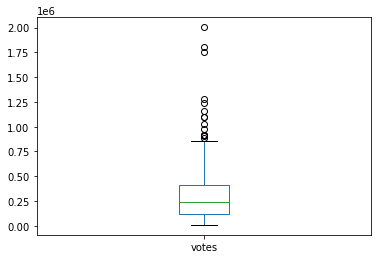

In [46]:
#looking at the number of votes movies in the combined dataframe got on average

com_votes = m_combine_fd[["votes"]].copy()

boxplot = com_votes.boxplot(grid = False)


In [47]:
med = com_votes.median()

print(f'The median number of votes in the combined set is {med}')

The median number of votes in the combined set is votes    240059.5
dtype: float64


In [48]:
l_df = m_df.sort_values(by = "duration", ascending = False)

l_df.head(20)

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
85057,tt9047474,La flor,2016,9/21/2018,"Drama, Fantasy, Musical",808,Argentina,"Catalan, Spanish, French, English, Russian, Ge...",Mariano Llinás,7.7,473,5.0,23.0
38038,tt0246135,"Out 1, noli me tangere",1971,11/18/2015,"Drama, Mystery",729,France,"French, English","Jacques Rivette, Suzanne Schiffman",7.8,1126,13.0,30.0
39346,tt0270784,Khleb - imya sushchestvitelnoe,1988,10/6/1988,"Drama, History, Romance",580,Soviet Union,Russian,Grigori Nikulin,5.8,157,NaN,NaN
54835,tt11617492,Orbius,2020,1/16/2020,Fantasy,570,Russia,None,Sergey A.,9.3,225,NaN,NaN
46153,tt0424062,Ebolusyon ng isang pamilyang Pilipino,2004,9/17/2004,Drama,540,Philippines,"Filipino, Tagalog, English",Lav Diaz,7.8,305,1.0,9.0
53877,tt1094643,Kagadanan sa banwaan ning mga engkanto,2007,12/30/2015,Drama,540,"Philippines, Netherlands","Filipino, Bicolano, English, Tagalog",Lav Diaz,7.4,165,2.0,8.0
50674,tt0843515,Heremias: Libro primo,2006,11/3/2006,"Crime, Drama",540,"Philippines, Netherlands, Sweden","Filipino, Tagalog",Lav Diaz,7.0,131,NaN,9.0
75922,tt4842296,Hele sa hiwagang hapis,2016,3/26/2016,"Adventure, Drama, Fantasy",485,"Philippines, Singapore","Tagalog, Spanish, Mandarin, Filipino, English",Lav Diaz,7.4,251,1.0,18.0
56257,tt1269566,Melancholia,2008,8/29/2008,Drama,450,Philippines,Filipino,Lav Diaz,7.4,366,1.0,9.0
18005,tt0076147,"Hitler, un film dalla Germania",1977,6/7/1978,"Biography, Drama",442,"West Germany, France, UK","German, English, French, Russian",Hans-Jürgen Syberberg,7.6,715,19.0,16.0


In [49]:
v_df = m_df.sort_values(by = "votes", ascending = False)

v_df.head(25)

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
28453,tt0111161,Le ali della libertà,1994,2/10/1995,Drama,142,USA,English,Frank Darabont,9.3,2278845,8232.0,164.0
48078,tt0468569,Il cavaliere oscuro,2008,7/23/2008,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,9.0,2241615,6938.0,423.0
57475,tt1375666,Inception,2010,9/24/2010,"Action, Adventure, Sci-Fi",148,"USA, UK","English, Japanese, French",Christopher Nolan,8.8,2002816,3927.0,473.0
32487,tt0137523,Fight Club,1999,10/29/1999,Drama,139,"USA, Germany",English,David Fincher,8.8,1807440,3758.0,370.0
28381,tt0110912,Pulp Fiction,1994,10/28/1994,"Crime, Drama",154,USA,"English, Spanish, French",Quentin Tarantino,8.9,1780147,3058.0,289.0
28066,tt0109830,Forrest Gump,1994,10/6/1994,"Drama, Romance",142,USA,English,Robert Zemeckis,8.8,1755490,2416.0,169.0
32229,tt0133093,Matrix,1999,5/7/1999,"Action, Sci-Fi",136,USA,English,"Lana Wachowski, Lilly Wachowski",8.7,1632315,4310.0,342.0
31279,tt0120737,Il Signore degli Anelli - La compagnia dell'An...,2001,1/18/2002,"Action, Adventure, Drama",178,"New Zealand, USA","English, Sindarin",Peter Jackson,8.8,1619920,5392.0,340.0
34127,tt0167260,Il Signore degli Anelli - Il ritorno del re,2003,1/22/2004,"Action, Adventure, Drama",201,"New Zealand, USA","English, Quenya, Old English, Sindarin",Peter Jackson,8.9,1604280,3718.0,353.0
15528,tt0068646,Il padrino,1972,9/21/1972,"Crime, Drama",175,USA,"English, Italian, Latin",Francis Ford Coppola,9.2,1572674,3977.0,253.0


In [50]:
med_bud = m_combine_fd[["Budget"]].copy()

med_b = med_bud.median()

print(f'The median number of buget in the combined set is {med_b}')

The median number of buget in the combined set is Budget    75000000.0
dtype: float64
